# Question 1. Load the Cifar-100 dataset
1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-100 dataset with 'coarse' labels
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

# Print shape of loaded data
print("Training images shape:", X_train.shape)
print("Training labels (coarse) shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels (coarse) shape:", y_test.shape)


Training images shape: (50000, 32, 32, 3)
Training labels (coarse) shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels (coarse) shape: (10000, 1)


2. Check if there are 20 labels in y_train using np.unique().

In [6]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)
print(unique_labels)
print(label_counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500
 2500 2500 2500 2500 2500 2500]


3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

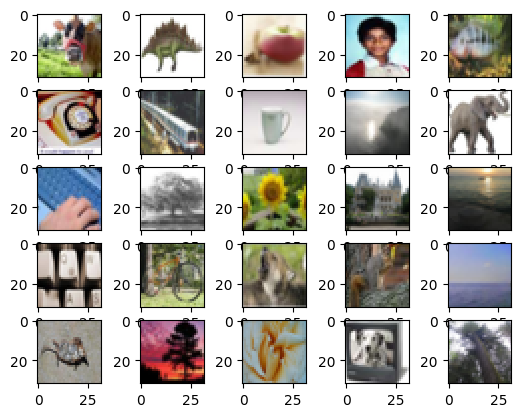

In [14]:
plt.figure()
for i in range(25):
  plt.subplot(5,5,1+i)
  plt.imshow(X_train[i])
plt.show()

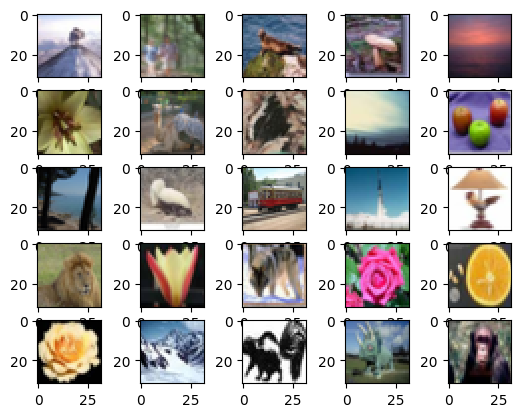

In [15]:
plt.figure()
for i in range(25):
  plt.subplot(5,5,1+i)
  plt.imshow(X_test[i])
plt.show()

4. Normalize the data

In [16]:
X_train, X_test = X_train / 255.0, X_test / 255.0

It can be seen that the model couldn't achieve a good accuracy. We need to use better models for this task.

# Question 2 : Implement VGGNet - Part 1

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models.

We can check the VGGNet-16 model. It consists of 16 layers with weights and some maxpooling layers. The architecture could be in the internet (even in the slides).

VGGNet works on images of size (224,224,3). However, we can implement it on (32,32,3). We will see both the approaches. First let's build VGGNet and train it on original image. Then, we will reshape our images from (32,32,3) to (224,224,3) and train VGGNet on them.

The layers are :

1. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
2. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
3. MaxPooling . kernel = 2x2. strides = (2,2).
4. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
5. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
6. MaxPooling . kernel = 2x2. strides = (2,2).
7. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
8. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
9. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
10. MaxPooling . kernel = 2x2. strides = (2,2).
11. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
12. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
13. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
14. MaxPooling . kernel = 2x2. strides = (2,2).
15. Flatten Layer.
16. Dense layer of 4096 neurons.
17. Dense layer of 1000 neurons.
18. Dense layer of 20 neurons.


I have omitted the last block of three conv layers of 512 kernels because the output sizes reduces to (1,1,512). You may include it and see.

The order of convolution, batch normalization and relu activation matters. If you do relu activation before normalization, it may happen that your loss fails to backpropagate.

In [18]:
from tensorflow.keras import models,layers
model1 = models.Sequential([
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation=None, padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(64, (3, 3), strides=(1, 1), activation=None, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    layers.Conv2D(128, (3, 3), strides=(1, 1), activation=None, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(128, (3, 3), strides=(1, 1), activation=None, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    layers.Conv2D(256, (3, 3), strides=(1, 1), activation=None, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(256, (3, 3), strides=(1, 1), activation=None, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(256, (3, 3), strides=(1, 1), activation=None, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    layers.Conv2D(512, (3, 3), strides=(1, 1), activation=None, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(512, (3, 3), strides=(1, 1), activation=None, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(512, (3, 3), strides=(1, 1), activation=None, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    layers.Flatten(),

    layers.Dense(4096, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(20)
])


Once you are ready with the model, change runtime to GPU and then train the model, else it will take a lot of time to train it on CPU.

Compile the model using SparseCategoricalCrossentropy Loss Function and accuracy metric. Fit it on the train dataset. and evaluate on the test.

In [19]:
model1.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

https://colab.research.google.com/drive/13R9SKVmVMhCqOnf13eJIj4XbQ2AsWJwt?usp=sharing

AS GPU SUPPORTED IN GOOGLE COLAB
